In [2]:
!pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     -------------------------------------- 151.4/151.4 kB 8.8 MB/s eta 0:00:00


In [3]:
from wordcloud import WordCloud

In [4]:
# 한글 문장 리스트
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.",
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]

sentences = [
    "이 영화 정말 재밌었어요!",
    "배우들의 연기력이 뛰어났네요.",
    "전체적인 스토리가 흥미로웠습니다.",
    "음악과 영상미가 아름답게 어우러져서 좋았어요.",
    "예상하지 못한 전개에 긴장감을 느낄 수 있었습니다.",
    "감동적인 결말이 너무 좋았어요.",
    "영화 속 세세한 디테일들이 신경쓰여서 좋았습니다.",
    "주인공의 성장 이야기가 인상깊었습니다.",
    "재미있는 액션 장면들이 많아서 긴장감을 유지할 수 있었습니다.",
    "다양한 감정을 한껏 경험할 수 있는 영화였습니다."
]

## 자연어 처리 위한 단어 생성

In [5]:
# "맛있는 음식을 먹으러 갈까요?" -> 4개
# "여행 계획을 세우고 있는데 어디로 갈까요?" -> 6개
# 단어는 10개이지만 동일한 단어 존재 가능(갈까요?)
# 전체 단어의 개수에 따라서 wordcloud의 단어 크기가 달라진다

# 문장 합치기
text = ' '.join(sentences)
text

'이 영화 정말 재밌었어요! 배우들의 연기력이 뛰어났네요. 전체적인 스토리가 흥미로웠습니다. 음악과 영상미가 아름답게 어우러져서 좋았어요. 예상하지 못한 전개에 긴장감을 느낄 수 있었습니다. 감동적인 결말이 너무 좋았어요. 영화 속 세세한 디테일들이 신경쓰여서 좋았습니다. 주인공의 성장 이야기가 인상깊었습니다. 재미있는 액션 장면들이 많아서 긴장감을 유지할 수 있었습니다. 다양한 감정을 한껏 경험할 수 있는 영화였습니다.'

In [6]:
# split 후 단어로 구성된 list 생성
text_split = text.split()
text_split

['이',
 '영화',
 '정말',
 '재밌었어요!',
 '배우들의',
 '연기력이',
 '뛰어났네요.',
 '전체적인',
 '스토리가',
 '흥미로웠습니다.',
 '음악과',
 '영상미가',
 '아름답게',
 '어우러져서',
 '좋았어요.',
 '예상하지',
 '못한',
 '전개에',
 '긴장감을',
 '느낄',
 '수',
 '있었습니다.',
 '감동적인',
 '결말이',
 '너무',
 '좋았어요.',
 '영화',
 '속',
 '세세한',
 '디테일들이',
 '신경쓰여서',
 '좋았습니다.',
 '주인공의',
 '성장',
 '이야기가',
 '인상깊었습니다.',
 '재미있는',
 '액션',
 '장면들이',
 '많아서',
 '긴장감을',
 '유지할',
 '수',
 '있었습니다.',
 '다양한',
 '감정을',
 '한껏',
 '경험할',
 '수',
 '있는',
 '영화였습니다.']

## 자연어 처리 위한 형태분석기 적용

In [7]:
from mecab import MeCab
mecab = MeCab()

In [13]:
mecab.nouns(sentences[0]), #mecab.pos(sentences[0])

(['영화'],
 [('이', 'MM'),
  ('영화', 'NNG'),
  ('정말', 'MAG'),
  ('재밌', 'VA'),
  ('었', 'EP'),
  ('어요', 'EF'),
  ('!', 'SF')])

In [16]:
morphs_list = list()
for sentence in sentences :
    morphs = mecab.nouns(sentence)
    morphs_list = morphs_list + morphs
morphs_list

['영화',
 '배우',
 '연기력',
 '전체',
 '스토리',
 '흥미',
 '음악',
 '영상',
 '미',
 '예상',
 '전개',
 '긴장감',
 '수',
 '감동',
 '결말',
 '영화',
 '속',
 '디테일',
 '신경',
 '주인공',
 '성장',
 '이야기',
 '액션',
 '장면',
 '긴장감',
 '유지',
 '수',
 '감정',
 '경험',
 '수',
 '영화']

In [18]:
from collections import Counter
nouns_count = Counter(morphs_list)

In [19]:
# 영어가 아닌 다른 언어를 입력 시 깨짐 -> 해당 폰트 경로를 넣어줘야 함.
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_frequencies(nouns_count)

In [20]:
wordCloud.words_

{'영화': 1.0,
 '수': 1.0,
 '긴장감': 0.6666666666666666,
 '배우': 0.3333333333333333,
 '연기력': 0.3333333333333333,
 '전체': 0.3333333333333333,
 '스토리': 0.3333333333333333,
 '흥미': 0.3333333333333333,
 '음악': 0.3333333333333333,
 '영상': 0.3333333333333333,
 '미': 0.3333333333333333,
 '예상': 0.3333333333333333,
 '전개': 0.3333333333333333,
 '감동': 0.3333333333333333,
 '결말': 0.3333333333333333,
 '속': 0.3333333333333333,
 '디테일': 0.3333333333333333,
 '신경': 0.3333333333333333,
 '주인공': 0.3333333333333333,
 '성장': 0.3333333333333333,
 '이야기': 0.3333333333333333,
 '액션': 0.3333333333333333,
 '장면': 0.3333333333333333,
 '유지': 0.3333333333333333,
 '감정': 0.3333333333333333,
 '경험': 0.3333333333333333}

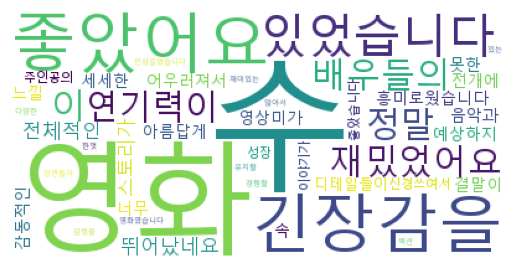

In [11]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') # plt 옵션 : 축 없애기
plt.show()